# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.072326e+01     6.870728e+00
 * time: 0.004292011260986328
     1     2.932678e+01     5.924510e+00
 * time: 0.016589879989624023
     2     1.821260e+01     3.525472e+00
 * time: 0.04036092758178711
     3     1.392416e+01     3.408880e+00
 * time: 0.06008291244506836
     4     1.376468e+01     3.357604e+00
 * time: 0.0760807991027832
     5     1.292275e+01     2.206267e+00
 * time: 0.09174489974975586
     6     1.239920e+01     3.290323e+00
 * time: 0.10771799087524414
     7     1.131048e+01     2.711731e+00
 * time: 0.12366485595703125
     8     1.027329e+01     1.861151e+00
 * time: 0.1393718719482422
     9     9.688219e+00     8.990186e-01
 * time: 0.15564489364624023
    10     9.410510e+00     6.699225e-01
 * time: 0.17157793045043945
    11     9.182454e+00     7.065201e-01
 * time: 0.18352580070495605
    12     9.097824e+00     4.796621e-01
 * time: 0.19562888145446777
    13     9.085616e+00     6.512195e-01
 * time:

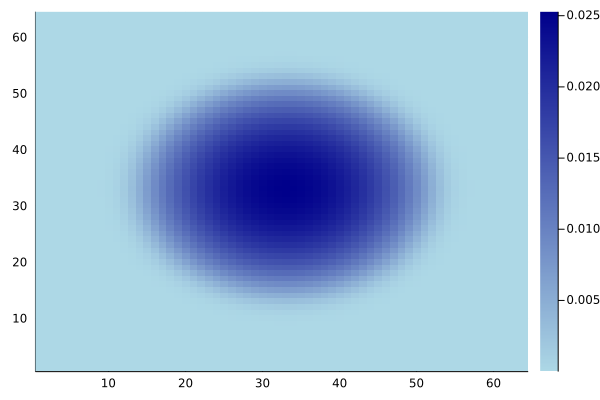

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)